In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [2]:
df = pd.read_csv('diamonds.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


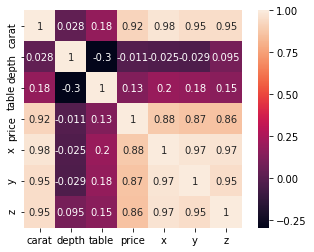

In [4]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
from sklearn.model_selection import KFold
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})


In [5]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()

X_train = np.array(train_data['carat'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['carat'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)

rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
cv = float(format(cross_val_score(lr,df[['carat']],df['price'],cv=crossvalidation).mean(),'.3f'))

print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
print('Intercept: {:.2f}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Price for Test Data: 3933.85
Intercept: -2258.13
Coefficient: [7762.71282134]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,1541.202,0.85,-,0.849,-,0.849


In [6]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)

features = ['carat','x','y','z','depth','table']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

coefficients = complex_model_1.coef_
coeff = dict(zip(features, coefficients))

print('Intercept: {:2f}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(coeff ))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))

rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))


artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
cv = float(format(cross_val_score(complex_model_1,df[features],df['price'],cv=crossvalidation).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 21264.403842
Coefficients: {'carat': 10769.828859118203, 'x': -1310.500193304967, 'y': 41.92745122265945, 'z': 20.529401210812445, 'depth': -205.9570287221692, 'table': -104.54923160484066}


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,1496.225,0.86,0.86,0.857,0.857,0.859
0,Simple Linear Regression,-,1541.202,0.85,-,0.849,-,0.849


In [7]:
dict(coeff)

{'carat': 10769.828859118203,
 'x': -1310.500193304967,
 'y': 41.92745122265945,
 'z': 20.529401210812445,
 'depth': -205.9570287221692,
 'table': -104.54923160484066}

In [8]:

# def regression(data,xcol,ycol,cv, simple=True):
#     train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

#     lr = linear_model.LinearRegression()

#     X_train = np.array(train_data['carat'], dtype=pd.Series).reshape(-1,1)
#     y_train = np.array(train_data['price'], dtype=pd.Series)
#     lr.fit(X_train,y_train)

#     X_test = np.array(test_data['carat'], dtype=pd.Series).reshape(-1,1)
#     y_test = np.array(test_data['price'], dtype=pd.Series)

#     pred = lr.predict(X_test)

#     rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
#     rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#     rtesm = float(format(lr.score(X_test, y_test),'.3f'))
#     crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
#     cv = float(format(cross_val_score(lr,df[['carat']],df['price'],cv=crossvalidation).mean(),'.3f'))

#     print ("Average Price for Test Data: {:.2f}".format(y_test.mean()))
#     print('Intercept: {:.2f}'.format(lr.intercept_))
#     print('Coefficient: {}'.format(lr.coef_))

#     r = evaluation.shape[0]
#     evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
#     evaluation

In [10]:
df.corr()*100

,carat,depth,table,price,x,y,z
carat,100.000000,2.822431,18.161755,92.159130,97.509423,95.172220,95.338738
depth,2.822431,100.000000,-29.577852,-1.064740,-2.528925,-2.934067,9.492388
table,18.161755,-29.577852,100.000000,12.713390,19.534428,18.376015,15.092869
price,92.159130,-1.064740,12.713390,100.000000,88.443516,86.542090,86.124944
x,97.509423,-2.528925,19.534428,88.443516,100.000000,97.470148,97.077180
y,95.172220,-2.934067,18.376015,86.542090,97.470148,100.000000,95.200572
z,95.338738,9.492388,15.092869,86.124944,97.077180,95.200572,100.000000
